In [ ]:
import pandas as pd
import os
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

raw_df = pd.read_csv('../data/raw/bank-marketing-campaign-data.csv', delimiter=';')
raw_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [127]:
raw_df.shape

(41188, 21)

<Axes: xlabel='cons.conf.idx'>

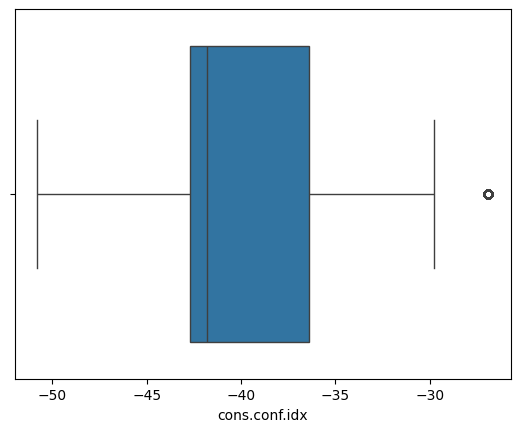

In [161]:
sns.boxplot(x=raw_df['cons.conf.idx'])

In [179]:
import pandas as pd
def splitter(origin_root,predictors,target):
    import os
    from sklearn.model_selection import train_test_split
    csv_files = []

    for file in os.listdir(origin_root):
        if file.endswith(".csv"):
            csv_files.append(os.path.join(origin_root, file))
    
    for df_root in csv_files:
        df = pd.read_csv(df_root, delimiter=';')
        X = df[predictors]
        Y = df[target]

        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
        
        name = (df_root.split('/'))[-1].split('.')[0]       
        destino =origin_root+'/SplitData/'
        os.makedirs(destino)

        X_train.to_csv(destino+name+'_Xtrain.csv', index=False)
        X_test.to_csv(destino+name+'_Xtest.csv', index=False)
        y_train.to_csv(destino+name+'_ytrain.csv', index=False)
        y_test.to_csv(destino+name+'_ytest.csv', index=False)


predictors = ['age', 'job', 'marital', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed']

target = 'y'
splitter('../data/processed/',predictors,target)

In [147]:
raw_df['cons.conf.idx'].describe()


count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64